In [37]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *
from bloom_allocator import *

# Optimization

In [38]:
zipfs = [ZipfWorkload(zipf_param=1.1),
         ZipfWorkload(zipf_param=1.25),
         ZipfWorkload(zipf_param=1.5)]

In [39]:
timedecs = [DiscoverDecayWorkload(creates=scipy.stats.poisson(10), updates=scipy.stats.poisson(8)),
            DiscoverDecayWorkload(creates=scipy.stats.poisson(5)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(10, 1)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(1, 1))]

In [40]:
robins = [RoundRobinWorkload()]

In [41]:
def optimize(workload, total_memory, assignment, dM=100):
  trees = []
  lsmtree = lsmulate(workload.queries)
  bloomem = 0
  while True:
    cachemem = total_memory - bloomem
    if cachemem < 0: break
    trees.append(lsmulate(workload.queries, cache_size=cachemem, bloom_size=assignment(bloomem, lsmtree).astype(int)))
    bloomem += dM
  return trees

In [42]:
baseline_trees = optimize(zipfs[2], 10000, baseline_assignment)

In [43]:
monkey_trees = optimize(zipfs[2], 10000, monkey_assignment)

In [44]:
baseline_trees2 = optimize(zipfs[2], 1000, baseline_assignment)
monkey_trees2 = optimize(zipfs[2], 1000, monkey_assignment)

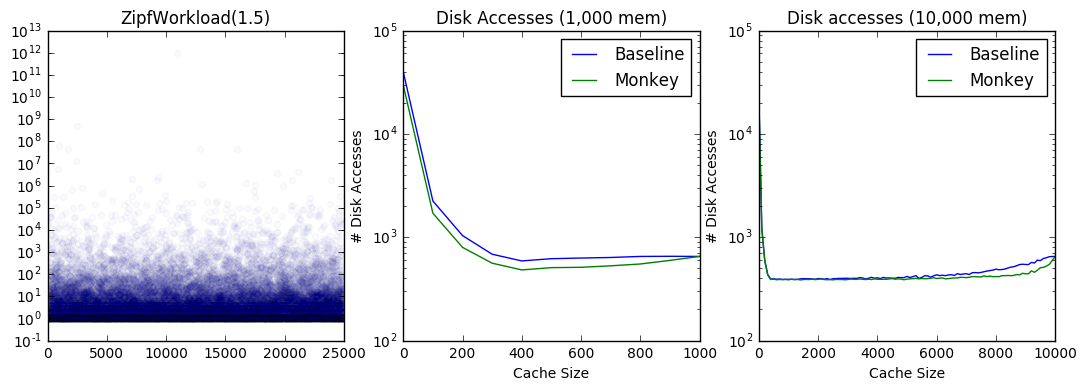

In [49]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(zipfs[2].__str__())
q = zipfs[2].queries
plt.scatter(range(len(q)), [qq[0]for qq in q], alpha=0.025)
plt.xlim(0, len(q))
plt.yscale('log')

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_trees], [t.disk_accesses for t in baseline_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_trees], [t.disk_accesses for t in monkey_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_trees2], [t.disk_accesses for t in baseline_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_trees2], [t.disk_accesses for t in monkey_trees2], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')
plt.show()

In [50]:
baseline_dec_trees = optimize(timedecs[0], 10000, baseline_assignment)
monkey_dec_trees = optimize(timedecs[0], 10000, monkey_assignment)

In [51]:
baseline_dec_trees2 = optimize(timedecs[0], 1000, baseline_assignment)
monkey_dec_trees2 = optimize(timedecs[0], 1000, monkey_assignment)

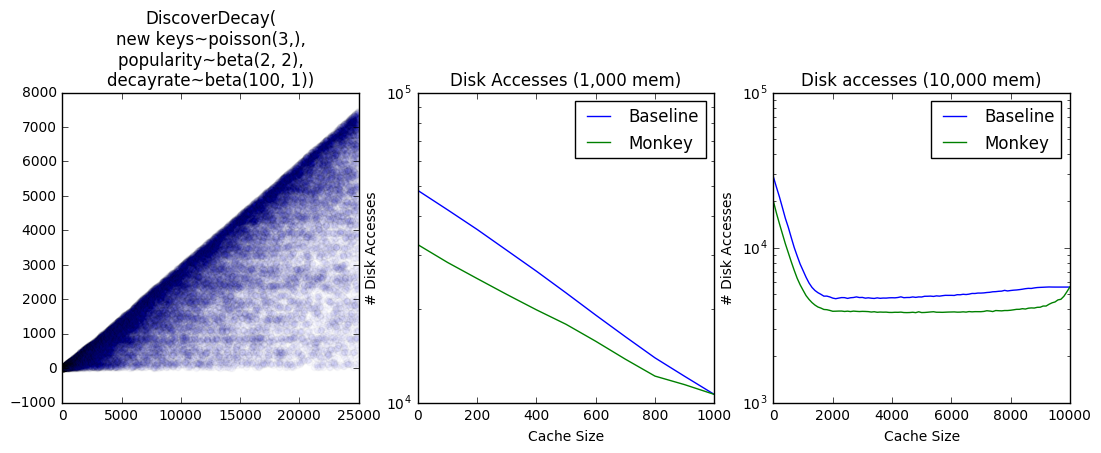

In [52]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(timedecs[0].__str__())
q = [qq[0] for qq in timedecs[0].queries]
plt.scatter(range(len(q)), q, alpha=0.025)
plt.xlim(0, len(q))

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_dec_trees], [t.disk_accesses for t in baseline_dec_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_dec_trees], [t.disk_accesses for t in monkey_dec_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_dec_trees2], [t.disk_accesses for t in baseline_dec_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_dec_trees2], [t.disk_accesses for t in monkey_dec_trees2], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.show()

In [56]:
baseline_rr_trees = optimize(robins[0], 10000, baseline_assignment)
monkey_rr_trees = optimize(robins[0], 10000, monkey_assignment)

In [57]:
baseline_rr_trees2 = optimize(robins[0], 1000, baseline_assignment)
monkey_rr_trees2 = optimize(robins[0], 1000, monkey_assignment)

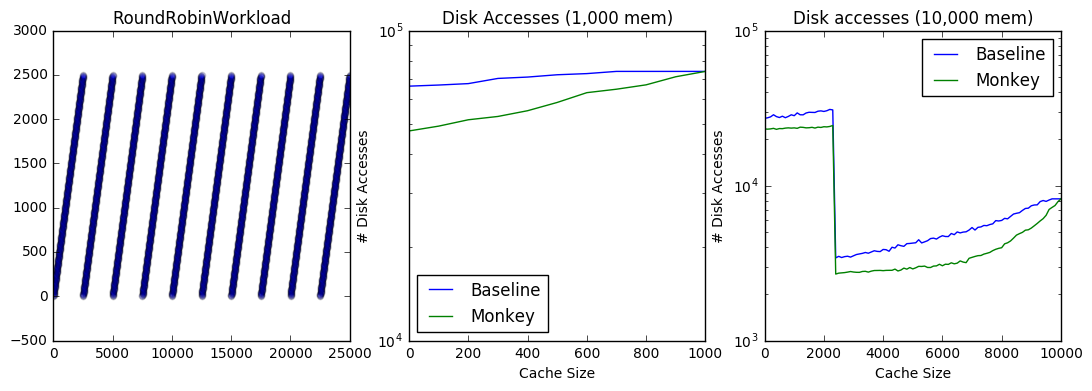

In [58]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(robins[0].__str__())
q = robins[0].queries
plt.scatter(range(len(q)), [qq[0]for qq in q], alpha=0.025)

plt.xlim(0, len(q))

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_rr_trees], [t.disk_accesses for t in baseline_rr_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_rr_trees], [t.disk_accesses for t in monkey_rr_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_rr_trees2], [t.disk_accesses for t in baseline_rr_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_rr_trees2], [t.disk_accesses for t in monkey_rr_trees2], label='Monkey')
plt.legend(loc='best')
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.show()